In [33]:
import pandas as pd
import csv
import pickle
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from imblearn.pipeline import make_pipeline
from pandas.plotting import scatter_matrix
from pandas import DataFrame
from sklearn import linear_model
import statsmodels.api as sm
import tkinter as tk 

%matplotlib inline

In [5]:
#Open dataset of phx, az restuarants (just the business variables)
df=pd.read_csv('C:/Users/S/Documents/just.csv',encoding='latin-1')

In [6]:
#DF info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3805 entries, 0 to 3804
Data columns (total 84 columns):
Unnamed: 0                    3805 non-null int64
business_id                   3805 non-null object
name                          3805 non-null object
neighborhood                  0 non-null float64
address                       3748 non-null object
city                          3805 non-null object
state                         3805 non-null object
postal_code                   3799 non-null float64
latitude                      3805 non-null float64
longitude                     3805 non-null float64
stars                         3805 non-null float64
review_count                  3805 non-null int64
is_open                       3805 non-null int64
BikeParking                   2677 non-null object
BusinessAcceptsCreditCards    3654 non-null object
Garage                        3360 non-null object
Street_Parking                3360 non-null object
Validated_Parking          

In [7]:
df.head(5)

,Unnamed: 0,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,...,DietaryRestrictions,categories,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Mexican
0,1,_c3ixq9jYKxhLUB0czi0ug,Original Hamburger Works,NaN,2801 N 15th Ave,Phoenix,AZ,85007.0,33.479807,-112.091188,...,NaN,"Bars, Sports Bars, Dive Bars, Burgers, Nightli...",11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-23:0,11:0-22:0,11:0-21:0,0
1,2,3ByGQOVgds2YEu6kzl-XEQ,Rib Shop,NaN,4131 N 83rd Ave,Phoenix,AZ,85033.0,33.495298,-112.236076,...,NaN,"Nightlife, Bars, American (Traditional), Sport...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,3,CeuTRtwsq6w5rztGOyNMPg,Salsitas,NaN,7745 W Thomas Rd,Phoenix,AZ,85033.0,33.479671,-112.225173,...,NaN,"Mexican, Restaurants",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,4,AcGRSWCpb7YB95MTsHlGEw,Little Caesars Pizza,NaN,4145 N 83Rd,Phoenix,AZ,85033.0,33.495422,-112.235798,...,NaN,"Pizza, Fast Food, Restaurants",10:30-22:0,10:30-22:0,10:30-22:0,10:30-22:0,10:30-23:0,10:30-23:0,10:30-22:0,0
4,5,cKRMmytHxaSt8F0SMEzKqg,Manuel's Mexican Restaurant & Cantina - Bell Rd,NaN,1111 W Bell Rd,Phoenix,AZ,85023.0,33.639774,-112.087738,...,NaN,"Event Planning & Services, Soup, Salad, Mexica...",11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-23:0,8:0-23:0,8:0-23:0,1


In [8]:
#Fix the data issues in 2 columns
df['casual'] = df['casual'].str.replace('}','')

df['Garage'] = df['Garage'].str.replace('street','')

In [9]:
#Drop variables that are empty or not needed
df=df.drop(['Unnamed: 0','neighborhood','Mexican' ], axis=1)

In [10]:
#Convert variables to string to enable changing true/false to 1/0
df["AcceptsInsurance"] = df['AcceptsInsurance'].astype('str')
df["BYOB"] = df['BYOB'].astype('str')
df["BikeParking"] = df['BikeParking'].astype('str')
df["BusinessAcceptsBitcoin"] = df['BusinessAcceptsBitcoin'].astype('str')
df["BusinessAcceptsCreditCards"] = df['BusinessAcceptsCreditCards'].astype('str')
df["ByAppointmentOnly"] = df['ByAppointmentOnly'].astype('str')
df["Caters"] = df['Caters'].astype('str')
df["CoatCheck"] = df['CoatCheck'].astype('str')
df["Corkage"] = df['Corkage'].astype('str')
df["DogsAllowed"] = df['DogsAllowed'].astype('str')
df["DriveThru"] = df['DriveThru'].astype('str')
df["Garage"] = df['Garage'].astype('str')
df["GoodForDancing"] = df['GoodForDancing'].astype('str')
df["GoodForKids"] = df['GoodForKids'].astype('str')
df["HappyHour"] = df['HappyHour'].astype('str')
df["HasTV"] = df['HasTV'].astype('str')
df["Open24Hours"] = df['Open24Hours'].astype('str')
df["OutdoorSeating"] = df['OutdoorSeating'].astype('str')
df["Parking_Lot"] = df['Parking_Lot'].astype('str')
df["RestaurantsCounterService"] = df['RestaurantsCounterService'].astype('str')
df["RestaurantsDelivery"] = df['RestaurantsDelivery'].astype('str')
df["RestaurantsGoodForGroups"] = df['RestaurantsGoodForGroups'].astype('str')
df["RestaurantsReservations"] = df['RestaurantsReservations'].astype('str')
df["RestaurantsTableService"] = df['RestaurantsTableService'].astype('str')
df["RestaurantsTakeOut"] = df['RestaurantsTakeOut'].astype('str')
df["Street_Parking"] = df['Street_Parking'].astype('str')
df["Valet"] = df['Valet'].astype('str')
df["Validated_Parking"] = df['Validated_Parking'].astype('str')
df["WheelchairAccessible"] = df['WheelchairAccessible'].astype('str')
df["dessert"] = df['dessert'].astype('str')
df["latenight"] = df['latenight'].astype('str')
df["lunch"] = df['lunch'].astype('str')
df["dinner"] = df['dinner'].astype('str')
df["breakfast"] = df['breakfast'].astype('str')
df["brunch"] = df['brunch'].astype('str')
df["romantic"] = df['romantic'].astype('str')
df["intimate"] = df['intimate'].astype('str')
df["classy"] = df['classy'].astype('str')
df["hipster"] = df['hipster'].astype('str')
df["divey"] = df['divey'].astype('str')
df["Garage"] = df['Garage'].astype('str')
df["touristy"] = df['touristy'].astype('str')
df["trendy"] = df['trendy'].astype('str')
df["upscale"] = df['upscale'].astype('str')
df["casual"] = df['casual'].astype('str')

In [11]:
#Convert True/False to 1/0
mapping = {'True': 1, 'False': 0}
df = df.replace(mapping)

In [12]:
#Change the string nan back into NaN
df=df.replace('nan', np.nan, regex=True)

In [13]:
#DF description
df.describe()

,postal_code,latitude,longitude,stars,review_count,is_open,BikeParking,BusinessAcceptsCreditCards,GoodForKids,HasTV,...,CoatCheck,Corkage,GoodForDancing,HappyHour,ByAppointmentOnly,AcceptsInsurance,BusinessAcceptsBitcoin,HairSpecializesIn,RestaurantsCounterService,Open24Hours
count,3799.000000,3805.000000,3805.000000,3805.000000,3805.000000,3805.000000,2677.000000,3654.000000,3492.000000,3099.000000,...,355.000000,107.000000,371.000000,393.000000,50.000000,4.00,396.000000,0.0,91.000000,60.000000
mean,85029.755199,33.500440,-112.064065,3.445466,98.655716,0.688305,0.800897,0.980843,0.876002,0.534366,...,0.028169,0.093458,0.099730,0.916031,0.160000,0.75,0.020202,NaN,0.582418,0.016667
std,35.168781,1.091066,0.065472,0.839661,179.567283,0.463247,0.399401,0.137096,0.329626,0.498898,...,0.165689,0.292443,0.300045,0.277696,0.370328,0.50,0.140869,NaN,0.495893,0.129099
min,85001.000000,-33.508570,-112.572188,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,NaN,0.000000,0.000000
25%,85014.000000,33.456161,-112.100501,3.000000,11.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.75,0.000000,NaN,0.000000,0.000000
50%,85022.000000,33.496074,-112.065638,3.500000,33.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.00,0.000000,NaN,1.000000,0.000000
75%,85035.000000,33.585741,-112.012934,4.000000,109.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.00,0.000000,NaN,1.000000,0.000000
max,85353.000000,33.874003,-111.790112,5.000000,2267.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00,1.000000,NaN,1.000000,1.000000


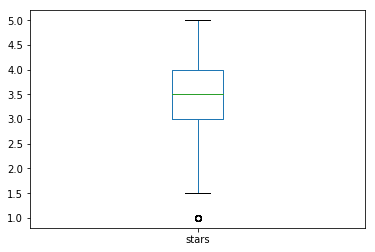

In [14]:
#Boxplot of stars
df.boxplot(column=['stars'],grid=False)

In [15]:
#Find cut off for top 15%
np.percentile(df['stars'], 85)

4.5

In [16]:
#Create target variable 4.5-5 is 1. Everything else is 0
df['target'] = np.where(df.stars >= 4.5, 1, 0)

In [17]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [18]:
missing_values_table(df)

Your selected dataframe has 82 columns.
There are 72 columns that have missing values.


,Missing Values,% of Total Values
HairSpecializesIn,3805,100.0
AgesAllowed,3801,99.9
AcceptsInsurance,3801,99.9
DietaryRestrictions,3781,99.4
ByAppointmentOnly,3755,98.7
Open24Hours,3745,98.4
RestaurantsCounterService,3714,97.6
Corkage,3698,97.2
BYOB,3663,96.3
BYOBCorkage,3566,93.7


In [19]:
#Remove variables that are missing more than 50%. Also remove variables that we won't use like city
df=df.drop(['name', 'address', 'city', 'state', 'postal_code' ,'latitude' ,'longitude' ,'stars' ,'review_count',
            'categories', 'Monday', 'Tuesday' ,'Wednesday', 'Thursday' ,'Friday', 'Saturday', 'Sunday','business_id', 
            'AcceptsInsurance','ByAppointmentOnly','Open24Hours','RestaurantsCounterService','Corkage','BYOB','CoatCheck',
            'GoodForDancing','HappyHour','BusinessAcceptsBitcoin','DogsAllowed','DriveThru','HairSpecializesIn',
            'AgesAllowed','DietaryRestrictions','BYOBCorkage','Best_Tue','Best_Fri','Best_Wed',
            'Best_Thr','Best_Sun','Best_Sat','Best_Mon','Smoking','Music'], axis=1)

In [20]:
pd.options.display.max_columns = None
df.head(5)

,is_open,BikeParking,BusinessAcceptsCreditCards,Garage,Street_Parking,Validated_Parking,Parking_Lot,Valet,GoodForKids,HasTV,NoiseLevel,OutdoorSeating,RestaurantsAttire,RestaurantsDelivery,RestaurantsGoodForGroups,RestaurantsPriceRange2,RestaurantsReservations,RestaurantsTakeOut,Alcohol,Caters,dessert,latenight,lunch,dinner,breakfast,brunch,RestaurantsTableService,WheelchairAccessible,WiFi,romantic,intimate,classy,hipster,divey,touristy,trendy,upscale,casual,target
0,1,1.0,1.0,False,False,False,True,False,1.0,1.0,average,1.0,casual,0.0,1.0,1.0,0.0,1.0,full_bar,0.0,False,False,True,True,False,False,0.0,1.0,no,False,False,False,False,False,False,False,False,True,0
1,1,NaN,1.0,False,False,False,False,False,0.0,1.0,average,0.0,casual,NaN,NaN,1.0,NaN,1.0,NaN,NaN,False,False,False,False,False,False,1.0,NaN,free,False,False,False,False,False,False,False,False,False,0
2,1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,0.0,casual,0.0,1.0,1.0,0.0,1.0,NaN,NaN,False,False,False,False,False,False,NaN,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1,0.0,1.0,False,False,False,False,False,1.0,0.0,average,1.0,casual,0.0,1.0,1.0,0.0,1.0,none,0.0,False,False,False,False,False,False,0.0,1.0,no,False,False,False,False,False,False,False,False,False,0
4,1,1.0,1.0,False,False,False,True,False,1.0,1.0,average,0.0,casual,0.0,1.0,2.0,1.0,1.0,full_bar,1.0,False,False,True,True,False,False,1.0,1.0,free,False,False,False,False,False,False,False,False,True,0


In [21]:
#Split up category variables into seperate columns
cat_vars=['Garage','NoiseLevel','Parking_Lot','RestaurantsAttire','Street_Parking','Valet','Validated_Parking','Alcohol',
          'WiFi','romantic','intimate','classy','hipster','divey','touristy','trendy','upscale','casual','dessert',
          'latenight','lunch','dinner','breakfast','brunch']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var)
    data1=df.join(cat_list)
    df=data1
cat_vars=['Garage','NoiseLevel','Parking_Lot','RestaurantsAttire','Street_Parking','Valet','Validated_Parking','Alcohol',
          'WiFi','romantic','intimate','classy','hipster','divey','touristy','trendy','upscale','casual','dessert',
          'latenight','lunch','dinner','breakfast','brunch']
data_vars=df.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [22]:
#Create df with the transformed variables
data_final=df[to_keep]
data_final.columns.values

array(['is_open', 'BikeParking', 'BusinessAcceptsCreditCards',
       'GoodForKids', 'HasTV', 'OutdoorSeating', 'RestaurantsDelivery',
       'RestaurantsGoodForGroups', 'RestaurantsPriceRange2',
       'RestaurantsReservations', 'RestaurantsTakeOut', 'Caters',
       'RestaurantsTableService', 'WheelchairAccessible', 'target',
       'Garage_ False ', 'Garage_ True ', 'NoiseLevel_average',
       'NoiseLevel_loud', 'NoiseLevel_quiet', 'NoiseLevel_very_loud',
       'Parking_Lot_ False', 'Parking_Lot_ True',
       'RestaurantsAttire_casual', 'RestaurantsAttire_dressy',
       'RestaurantsAttire_formal', 'Street_Parking_ False',
       'Street_Parking_ True', 'Valet_ False', 'Valet_ True',
       'Validated_Parking_ False', 'Validated_Parking_ True',
       'Alcohol_beer_and_wine', 'Alcohol_full_bar', 'Alcohol_none',
       'WiFi_free', 'WiFi_no', 'WiFi_paid', 'romantic_ False',
       'romantic_ True', 'intimate_ False', 'intimate_ True',
       'classy_ False', 'classy_ True', 'hipst

In [54]:
#Export cleaned data to csv
export_csv =data_final.to_csv (r'C:/Users/S/Documents/Courses/498/yelp_review.csv/test.csv', index = None, header=True)

Logistic MODEL

In [23]:
#Impute missing values using the most frequent value
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="most_frequent")
transformed=pd.DataFrame(imp.fit_transform(data_final))   


In [24]:
#Ensure new df has the same column names
transformed.columns = data_final.columns.values
transformed.head(5)

,is_open,BikeParking,BusinessAcceptsCreditCards,GoodForKids,HasTV,OutdoorSeating,RestaurantsDelivery,RestaurantsGoodForGroups,RestaurantsPriceRange2,RestaurantsReservations,RestaurantsTakeOut,Caters,RestaurantsTableService,WheelchairAccessible,target,Garage_ False,Garage_ True,NoiseLevel_average,NoiseLevel_loud,NoiseLevel_quiet,NoiseLevel_very_loud,Parking_Lot_ False,Parking_Lot_ True,RestaurantsAttire_casual,RestaurantsAttire_dressy,RestaurantsAttire_formal,Street_Parking_ False,Street_Parking_ True,Valet_ False,Valet_ True,Validated_Parking_ False,Validated_Parking_ True,Alcohol_beer_and_wine,Alcohol_full_bar,Alcohol_none,WiFi_free,WiFi_no,WiFi_paid,romantic_ False,romantic_ True,intimate_ False,intimate_ True,classy_ False,classy_ True,hipster_ False,hipster_ True,divey_ False,divey_ True,touristy_ False,touristy_ True,trendy_ False,trendy_ True,upscale_ False,upscale_ True,casual_ False,casual_ True,dessert_ False,dessert_ True,latenight_ False,latenight_ True,lunch_ False,lunch_ True,dinner_ False,dinner_ True,breakfast_ False,breakfast_ True,brunch_ False,brunch_ True
0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0


In [86]:
#Split the target variables from the other variables
X = transformed.loc[:, transformed.columns != 'target']
y = transformed.loc[:, transformed.columns == 'target']

In [87]:
#Split data into Test/Train and check for oversampling
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['target'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of bad ratings in oversampled data",len(os_data_y[os_data_y['target']==0]))
print("Number of good ratings",len(os_data_y[os_data_y['target']==1]))
print("Proportion of bad rating in oversampled data is ",len(os_data_y[os_data_y['target']==0])/len(os_data_X))
print("Proportion of good ratings in oversampled data is ",len(os_data_y[os_data_y['target']==1])/len(os_data_X))

length of oversampled data is  4454
Number of bad ratings in oversampled data 2227
Number of good ratings 2227
Proportion of bad rating in oversampled data is  0.5
Proportion of good ratings in oversampled data is  0.5


C:\Users\S\Anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [92]:
#Feature selection
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

C:\Users\S\Anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\S\Anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\S\Anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\S\Anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\S\Anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: 

[False False  True False False False False False False  True  True  True
 False  True  True False False  True False  True False False  True  True
 False False  True False  True False False  True  True False False False
 False False False False  True False False False  True False False False
  True False False False False False  True False False False False False
 False False False False  True False  True]
[ 3 40  1  5 22 32  9  7 28  1  1  1  4  1  1 43 31  1  8  1 39 14  1  1
  6 34  1 44  1 25 37  1  1 33 23 48 24 20 19 18  1 27 11 47  1 16 17 15
  1 35 10 36 21 46  1  2 29 42 41 38 26 30 45 12  1 13  1]


C:\Users\S\Anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\S\Anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\S\Anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\S\Anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [99]:
#Use selected features to run Logistic regression
cols=['BusinessAcceptsCreditCards','RestaurantsReservations','RestaurantsTakeOut','Caters','WheelchairAccessible',
      'NoiseLevel_loud','NoiseLevel_very_loud','RestaurantsAttire_casual','RestaurantsAttire_dressy',
      'Street_Parking_ True','Valet_ True','Alcohol_beer_and_wine','Alcohol_full_bar','intimate_ True','hipster_ True',
      'touristy_ True','casual_ True','breakfast_ True','brunch_ True'] 
X=os_data_X[cols]
y=os_data_y['target']

In [100]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.622013
         Iterations 7
                              Results: Logit
Model:                 Logit               Pseudo R-squared:    0.103      
Dependent Variable:    target              AIC:                 5578.8897  
Date:                  2019-02-17 11:54    BIC:                 5700.5193  
No. Observations:      4454                Log-Likelihood:      -2770.4    
Df Model:              18                  LL-Null:             -3087.3    
Df Residuals:          4435                LLR p-value:         6.5087e-123
Converged:             1.0000              Scale:               1.0000     
No. Iterations:        7.0000                                              
---------------------------------------------------------------------------
                            Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------------
BusinessAcceptsCr

In [103]:
#Drop the variables with p values higher than .05 and re-run
cols=['BusinessAcceptsCreditCards','RestaurantsReservations','Caters','WheelchairAccessible',
      'NoiseLevel_loud','NoiseLevel_very_loud','RestaurantsAttire_casual','RestaurantsAttire_dressy',
      'Street_Parking_ True','Valet_ True','Alcohol_beer_and_wine','Alcohol_full_bar','intimate_ True','hipster_ True',
      'touristy_ True','casual_ True','breakfast_ True','brunch_ True'
     ]
X=os_data_X[cols]
y=os_data_y['target']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.622240
         Iterations 7
                              Results: Logit
Model:                 Logit               Pseudo R-squared:    0.102      
Dependent Variable:    target              AIC:                 5578.9138  
Date:                  2019-02-17 11:55    BIC:                 5694.1418  
No. Observations:      4454                Log-Likelihood:      -2771.5    
Df Model:              17                  LL-Null:             -3087.3    
Df Residuals:          4436                LLR p-value:         2.8174e-123
Converged:             1.0000              Scale:               1.0000     
No. Iterations:        7.0000                                              
---------------------------------------------------------------------------
                            Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------------
BusinessAcceptsCr

In [104]:
#Run Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\S\Anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [105]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.67


[[465 214]
 [221 437]]


[Text(0, 0.5, 'Good_Rating'), Text(0, 1.5, 'Bad_Rating')]

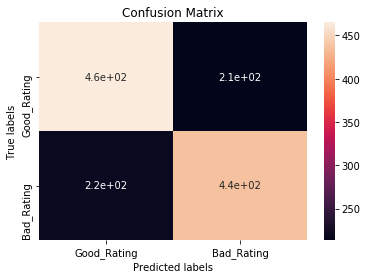

In [106]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
labels = ['Good_Rating', 'Bad_Rating']
ax= plt.subplot()
sns.heatmap(confusion_matrix, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Good_Rating', 'Bad_Rating']); ax.yaxis.set_ticklabels( ['Good_Rating', 'Bad_Rating'])

In [107]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.68      0.68      0.68       679
         1.0       0.67      0.66      0.67       658

   micro avg       0.67      0.67      0.67      1337
   macro avg       0.67      0.67      0.67      1337
weighted avg       0.67      0.67      0.67      1337



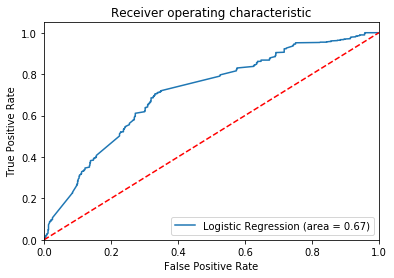

In [108]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

LINEAR MODEL

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E00030ED30>,
        ...,
        ...,
        ...,
       ...,
        ...,
        ...,
        ...,
      dtype=object)

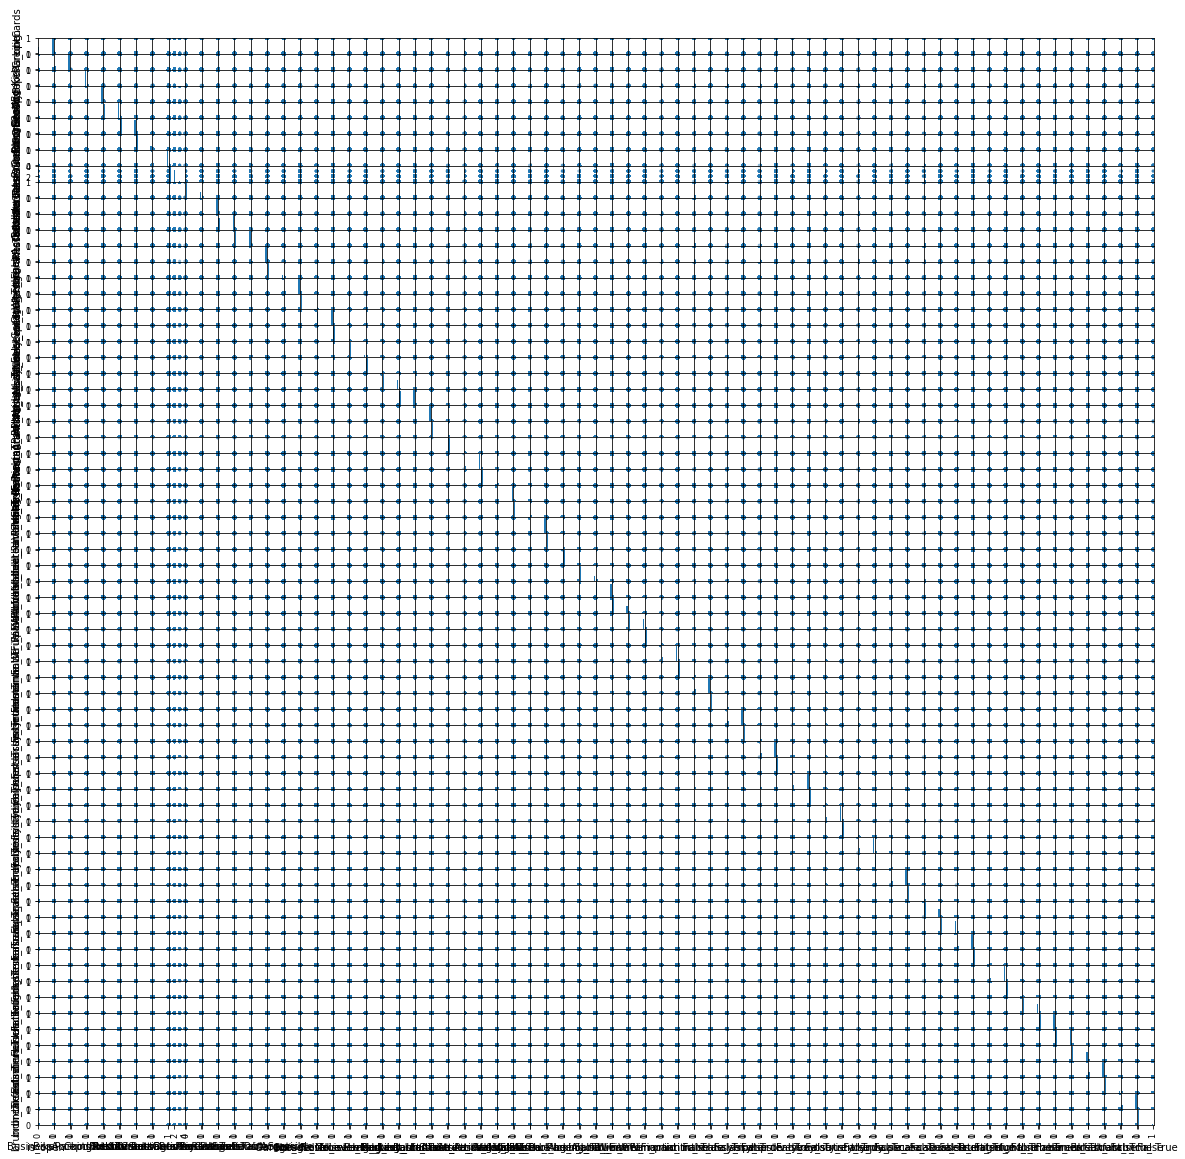

In [35]:
plt.rcParams["figure.figsize"] = (20,20)
scatter_matrix(data_final)

In [46]:
# Run regression will all variables
 
X = transformed.loc[:, transformed.columns != 'target']
y = transformed.loc[:, transformed.columns == 'target']    

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)



Intercept: 
 [0.43778982]
Coefficients: 
 [[ 3.63747621e-02 -2.75389548e-02 -1.38693021e-01 -1.84463669e-02
   3.20834991e-02  2.87488683e-02 -2.90090989e-02 -1.15880681e-02
  -1.60739348e-02  5.78626561e-02 -9.72038856e-02  6.01054145e-02
  -2.37438752e-02  8.39432403e-03 -2.59562159e+11 -2.59562159e+11
  -5.55889120e-02 -9.02602121e-02 -4.50469614e-03 -1.36609620e-01
   4.12089565e+10  4.12089565e+10 -1.53642939e-01 -1.85747485e-01
   8.57330448e-02 -3.64351118e+10 -3.64351118e+10  2.77800062e+11
   2.77800062e+11 -2.30117477e+10 -2.30117477e+10  1.43652011e-02
  -8.90278439e-02  3.94469550e-02  4.69301466e-02  2.39887728e-02
   1.23587912e-01 -1.87823285e+11 -1.87823285e+11 -2.99918945e+11
  -2.99918945e+11 -4.11045658e+10 -4.11045658e+10  6.74322485e+11
   6.74322485e+11 -1.89832819e+11 -1.89832819e+11  4.45016827e+11
   4.45016827e+11  5.07073616e+10  5.07073616e+10 -3.41438044e+11
  -3.41438044e+11 -1.09929015e+11 -1.09929015e+11 -2.30528816e+11
  -2.30528816e+11 -4.08584106e+10 

In [47]:
# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)




                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     7.383
Date:                Sun, 17 Feb 2019   Prob (F-statistic):           1.96e-47
Time:                        14:48:00   Log-Likelihood:                -1423.0
No. Observations:                3805   AIC:                             2948.
Df Residuals:                    3754   BIC:                             3266.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [48]:
#Drop the variables with p values higher than .05 and re-run
cols=['is_open','BusinessAcceptsCreditCards','HasTV','OutdoorSeating','RestaurantsReservations','RestaurantsTakeOut',
      'Caters','NoiseLevel_average','NoiseLevel_loud','NoiseLevel_very_loud','Parking_Lot_ True',
      'RestaurantsAttire_casual','RestaurantsAttire_dressy','Street_Parking_ False','Street_Parking_ True',
      'Alcohol_full_bar','WiFi_free','intimate_ True','classy_ True','hipster_ True','divey_ True',
      'trendy_ True','upscale_ True','casual_ True','dessert_ False','breakfast_ True','brunch_ False'
     ]
X=X[cols]

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     39.65
Date:                Sun, 17 Feb 2019   Prob (F-statistic):          7.19e-182
Time:                        14:48:10   Log-Likelihood:                -1463.3
No. Observations:                3805   AIC:                             2981.
Df Residuals:                    3778   BIC:                             3149.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
is_open             

In [49]:
#Drop the variables with p values higher than .05 and re-run
cols=['OutdoorSeating','RestaurantsReservations',
      'Caters','NoiseLevel_average','NoiseLevel_loud','NoiseLevel_very_loud',
      'RestaurantsAttire_casual','Street_Parking_ False','Street_Parking_ True',
      'Alcohol_full_bar','intimate_ True','hipster_ True','classy_ True','upscale_ True' ]

#'is_open','HasTV' 
X=X[cols]

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     67.08
Date:                Sun, 17 Feb 2019   Prob (F-statistic):          2.60e-170
Time:                        14:48:25   Log-Likelihood:                -1517.0
No. Observations:                3805   AIC:                             3062.
Df Residuals:                    3791   BIC:                             3149.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
OutdoorSeating          

In [50]:
# tkinter GUI
root= tk.Tk() 
 
canvas1 = tk.Canvas(root, width = 1200, height = 450)
canvas1.pack()

In [51]:
print_model = model.summary()
label_model = tk.Label(root, text=print_model, justify = 'center', relief = 'solid', bg='LightSkyBlue1')
canvas1.create_window(800, 220, window=label_model)


# New_Interest_Rate label and input box
label1 = tk.Label(root, text='Intimate Setting: ')
canvas1.create_window(100, 100, window=label1)

entry1 = tk.Entry (root) # create 1st entry box
canvas1.create_window(270, 100, window=entry1)

# New_Unemployment_Rate label and input box
label2 = tk.Label(root, text='Offer Street Parking: ')
canvas1.create_window(120, 120, window=label2)

entry2 = tk.Entry (root) # create 2nd entry box
canvas1.create_window(270, 120, window=entry2)


def values(): 
    global New_Intimate_Setting #our 1st input variable
    New_Interest_Rate = float(entry1.get()) 
    
    global New_Street_Parking #our 2nd input variable
    New_Unemployment_Rate = float(entry2.get()) 
    
    Prediction_result  = ('Predicted Stock Index Price: ', regr.predict([[New_Intimate_Setting ,New_Street_Parking]]))
    label_Prediction = tk.Label(root, text= Prediction_result, bg='orange')
    canvas1.create_window(260, 280, window=label_Prediction)
    
button1 = tk.Button (root, text='Predict Stock Index Price',command=values, bg='orange') # button to call the 'values' command above 
canvas1.create_window(270, 150, window=button1)
 

root.mainloop()

KeyboardInterrupt: 